## Some Exploratory Data Analysis


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data import *

# remove all columns except the first one for sample_submission
sample_submission = sample_submission.iloc[:, 0]

### Let's start with Subjective Poverty first


(5337, 11)


/var/folders/92/lv5lwsyj6pq0h_8d0gm14m680000gn/T/ipykernel_95077/4154581412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(range(1, 11)))


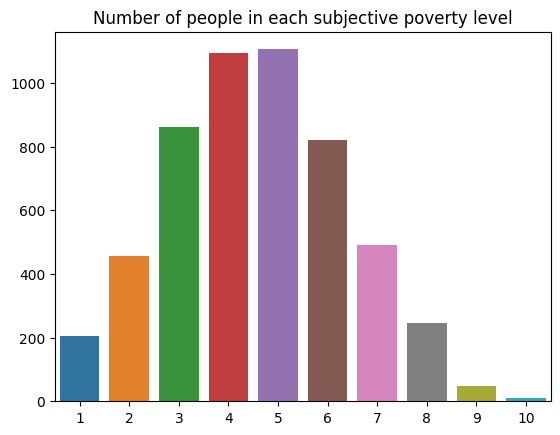

In [2]:
print(pov_train.shape)

# a very normal like distribution!
ax = sns.barplot(pov_train.iloc[:, 1:], estimator="sum", errorbar=None)
ax.set_xticklabels(list(range(1, 11)))
plt.title("Number of people in each subjective poverty level")
plt.show()

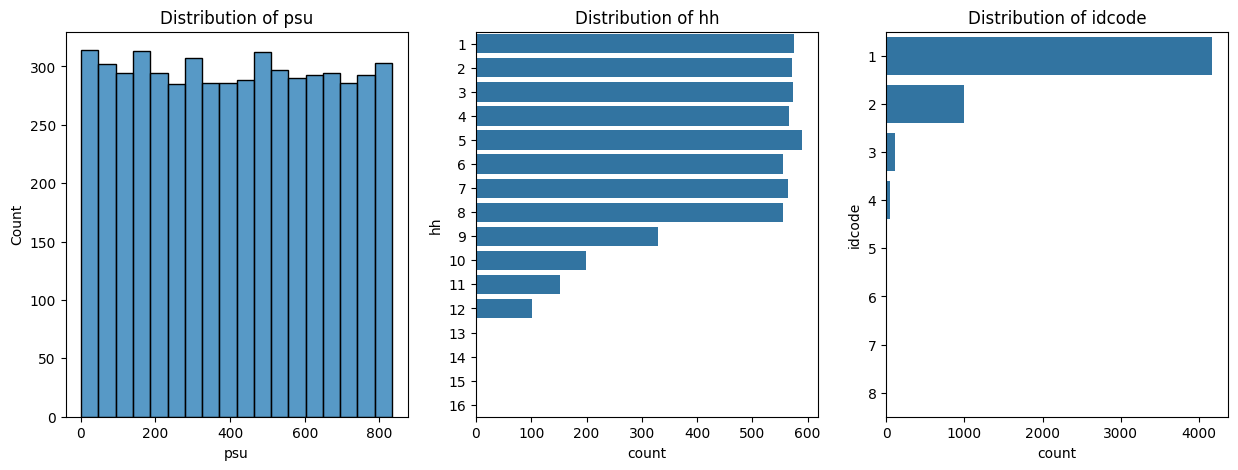

In [3]:
pov_train[["psu", "hh", "idcode"]] = (
    pov_train["psu_hh_idcode"].str.split("_", expand=True).astype(int)
)
# plot the distribution of psu, hh, and idcode
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(pov_train["psu"], ax=ax[0])
ax[0].set_title("Distribution of psu")
sns.countplot(pov_train["hh"].astype(str), ax=ax[1], order=list(range(1, 17)))
ax[1].set_title("Distribution of hh")
sns.countplot(pov_train["idcode"].astype(str), ax=ax[2], order=list(range(1, 9)))
ax[2].set_title("Distribution of idcode")
plt.show()

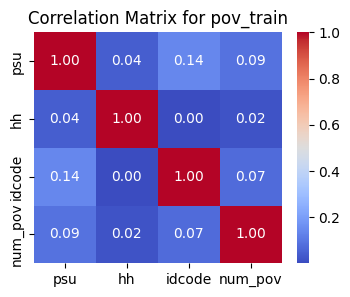

In [4]:
# we might as well convert it to a range of 1-10
# I also tried with just the classes themselves, but not much difference in the correlation matrix
pov_train["num_pov"] = (
    pov_train.iloc[:, 1:11].idxmax(axis=1).str.split("_").str[-1].astype(int)
)
# Calculate the correlation matrix
corr = pov_train[["psu", "hh", "idcode", "num_pov"]].corr()

# Generate a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for pov_train")
plt.show()

### Then Education data


In [5]:
edu_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22406 entries, 0 to 22405
Data columns (total 69 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   psu     22406 non-null  int64  
 1   hh      22406 non-null  int64  
 2   idcode  22406 non-null  int64  
 3   q01     22406 non-null  int64  
 4   q02     22406 non-null  int64  
 5   q03     22406 non-null  int64  
 6   q04     21513 non-null  float64
 7   q05     21513 non-null  float64
 8   q06     21513 non-null  float64
 9   q07     21513 non-null  float64
 10  Q08     21513 non-null  float64
 11  Q09     5565 non-null   float64
 12  Q10     39 non-null     float64
 13  Q11     15948 non-null  float64
 14  Q12     5526 non-null   float64
 15  Q13     5526 non-null   float64
 16  Q14     21513 non-null  float64
 17  Q15     5625 non-null   float64
 18  Q16     35 non-null     float64
 19  Q17     15888 non-null  float64
 20  Q18     15888 non-null  float64
 21  Q19     15923 non-null  float64
 22

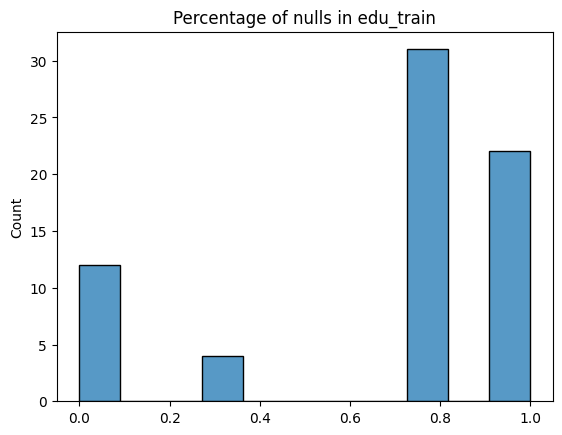

In [6]:
# there are a lot of nulls in the data
# we might as well just take the columns that have less than 50% nulls
# since we also have too many features to work with
sns.histplot(edu_train.isnull().sum(axis=0) / edu_train.shape[0])
plt.title("Percentage of nulls in edu_train")
plt.show()

['q01', 'q02', 'q03', 'q04', 'q05', 'q06', 'q07', 'Q08', 'Q14']


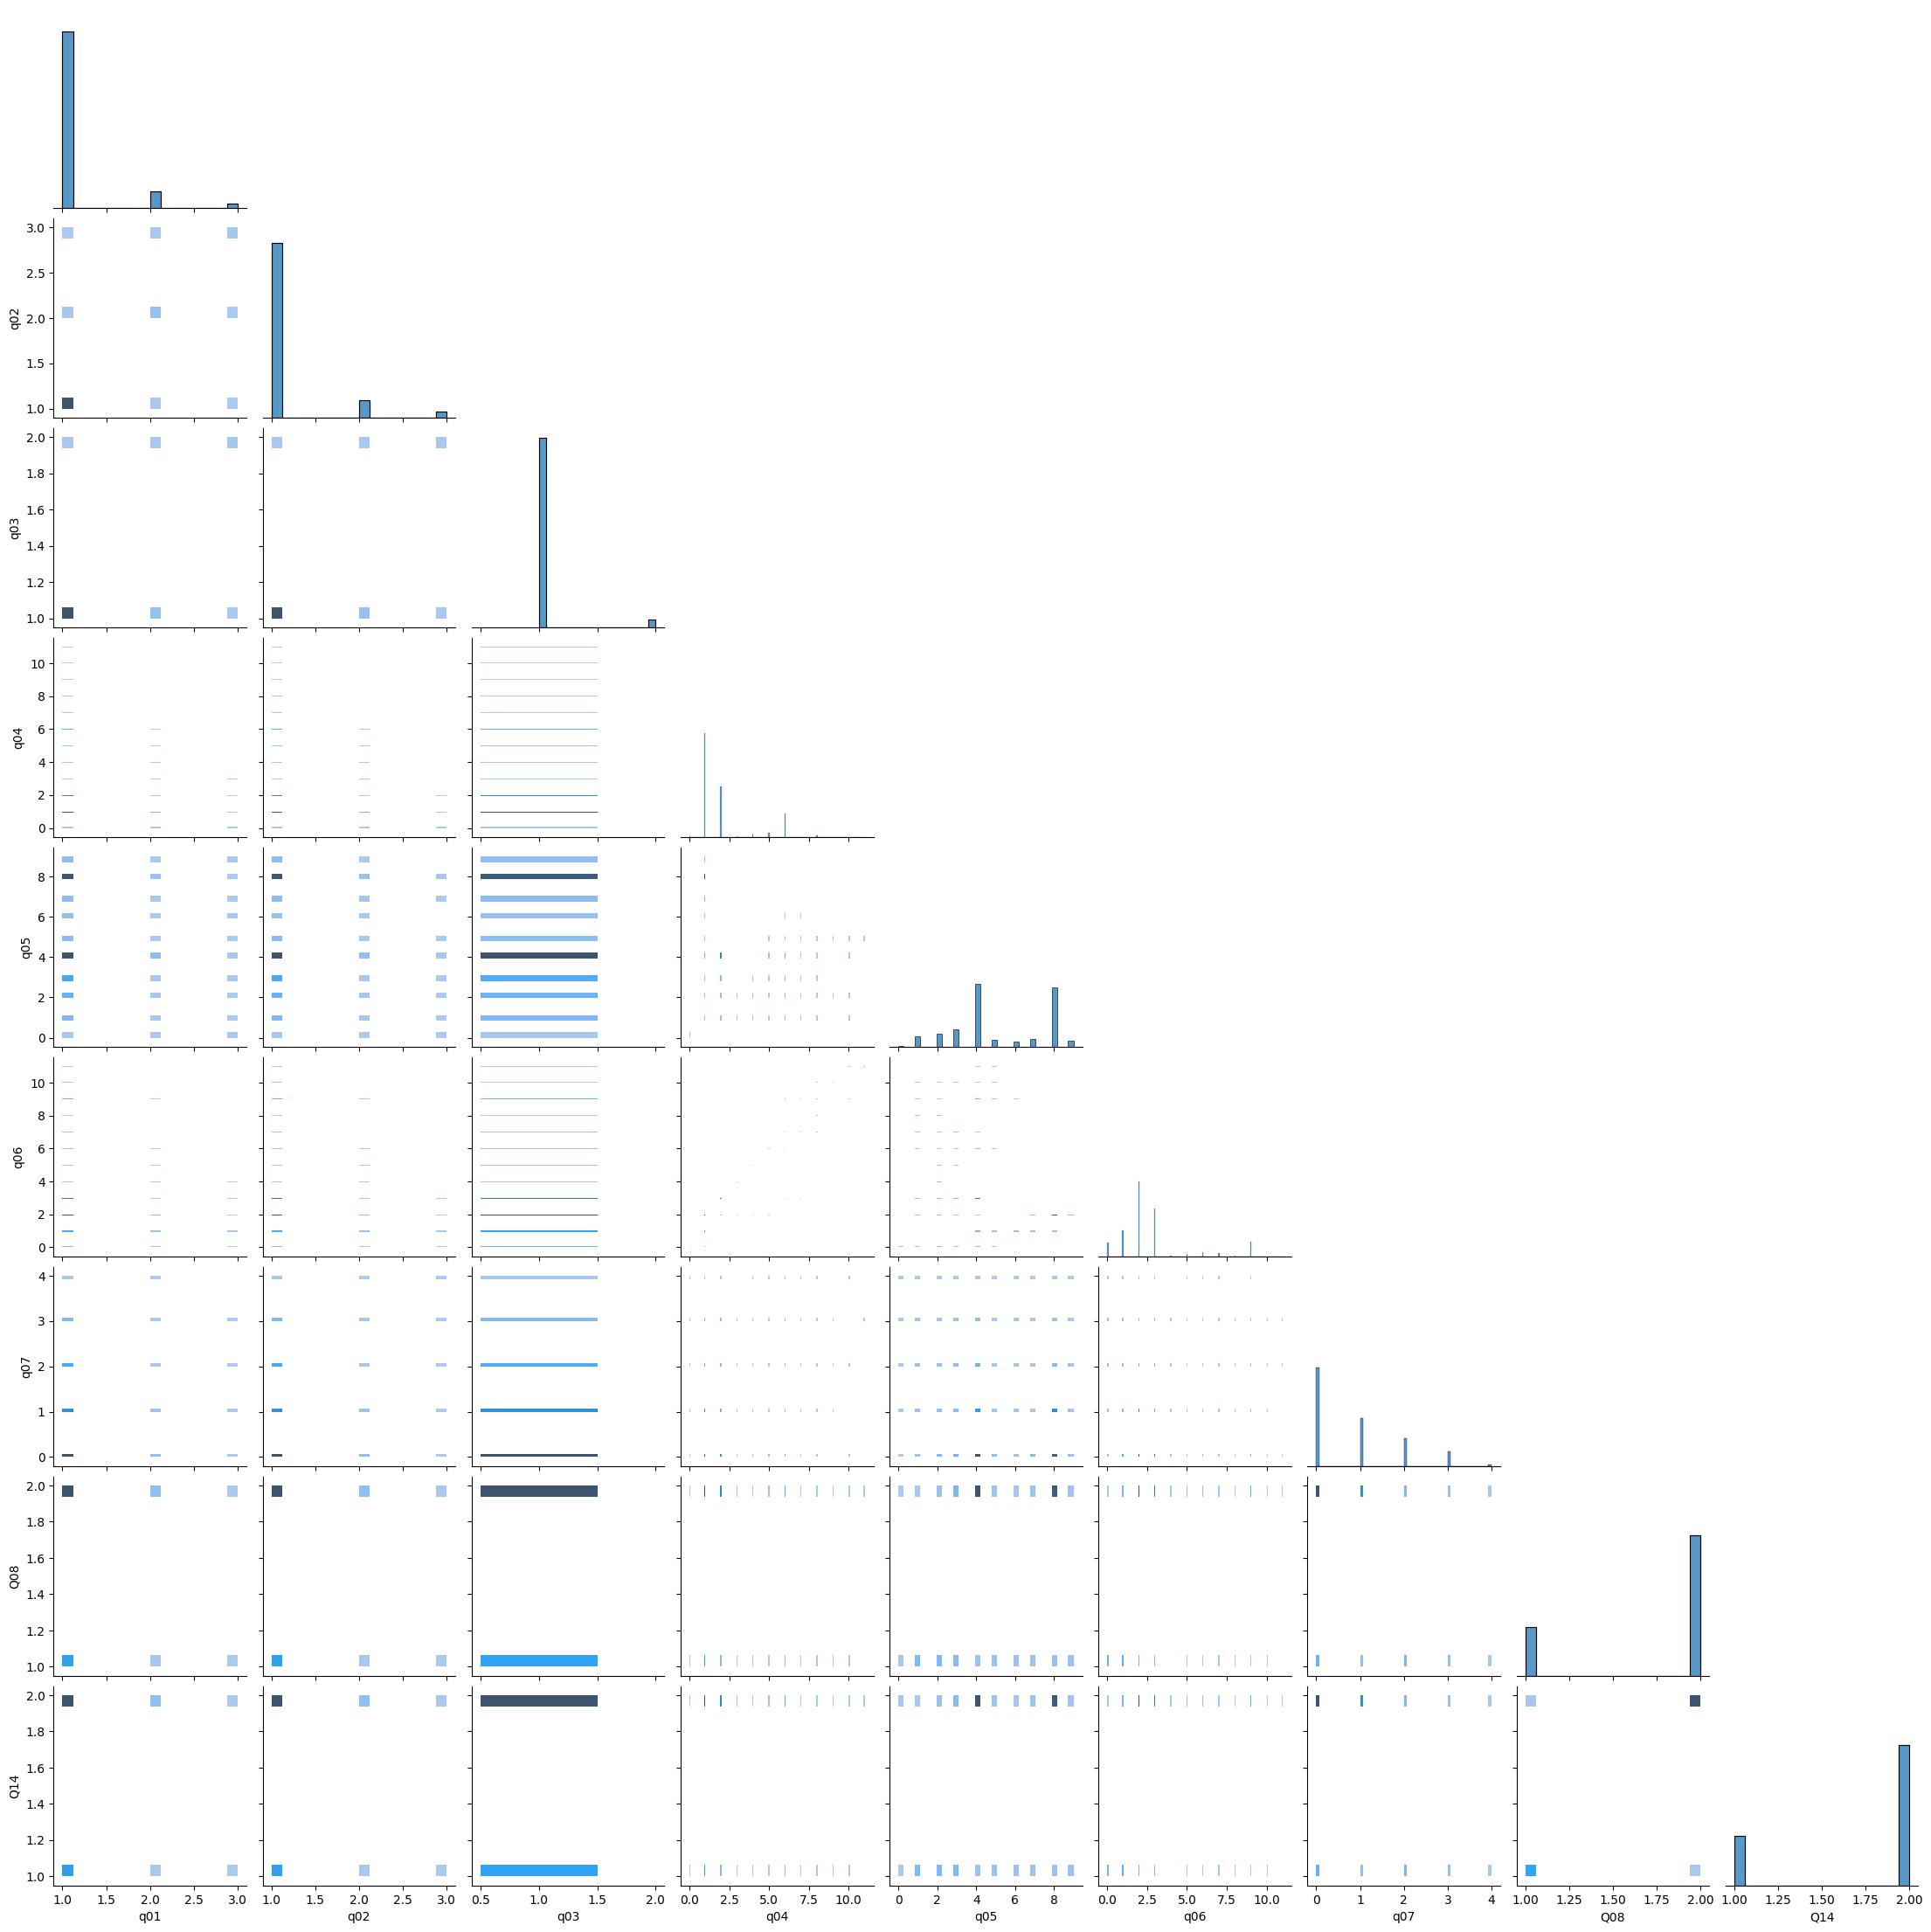

In [7]:
# they look pretty random to me, except for q4 and q6
# q4 and q6 are both related to education level, so it makes sense that they are correlated:
# q4) What is the highest grade [Name] have completed in school? In which level?
# q6) What is the highest diploma [Name] have attained?
threshold = 0.2
edu_selected_columns = edu_train.isnull().sum(axis=0) / edu_train.shape[0] < threshold
edu_selected_columns = edu_selected_columns[edu_selected_columns].index.tolist()

# they don't seem to have correlations, so I'm removing them from the plot for clarity
edu_selected_columns.remove("psu")
edu_selected_columns.remove("hh")
edu_selected_columns.remove("idcode")

sns.pairplot(edu_train[edu_selected_columns], kind="hist", corner=True)
print(edu_selected_columns)

In [8]:
# q1) Can [Name] read the newspaper?
# q2) Can [Name] write a one page personal letter?
# q3) Has [Name] ever attended school?
# q4, 5) What is the highest grade [Name] have completed in school? In which level?
# q6) What is the highest diploma [Name] have attained?
# q7) How many years of preschool did [Name] attend?
# q8) Did [Name] enroll or has you plans to enroll in school this academic year?
# q14) Did [NAME] enroll in the past academic year?

# q1-3 are somewhat related to each other (about their level of literacy)
# also q3 can terminate the survey if the answer is no. We might consider removing it too.

# q4 indicates most attended ["8 OR 9  YEARS" SCHOOL] or [GYMNAZIUM(SECONDARY GENERAL)]
# q5 range differs as it depends on q4, might consider removing it

# q7 appears like a 1/x distribution

# q8 & 14 these two appears to be closely related, the ones that didn't enroll in the past year are likely to not enroll in the current year

### The Household Data


In [9]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24001 entries, 0 to 24000
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   psu     24001 non-null  int64  
 1   hh      24001 non-null  int64  
 2   idcode  24001 non-null  int64  
 3   hhid    24001 non-null  int64  
 4   q02     24001 non-null  int64  
 5   q03     24001 non-null  int64  
 6   q04     24001 non-null  int64  
 7   q05y    24001 non-null  int64  
 8   q05m    24001 non-null  int64  
 9   q06     20465 non-null  float64
 10  q07     12148 non-null  float64
 11  q08     11761 non-null  float64
 12  q09     24001 non-null  int64  
 13  q10     24001 non-null  int64  
 14  q11     24001 non-null  int64  
 15  q12     11728 non-null  float64
 16  q13     12273 non-null  float64
 17  q14     12273 non-null  float64
 18  q15     6386 non-null   float64
 19  q16     5887 non-null   float64
 20  q17     24001 non-null  int64  
 21  q18     10697 non-null  float64
 22

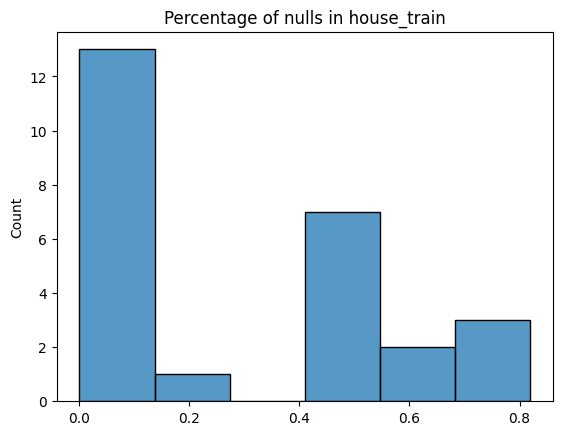

In [10]:
# Again, there are a lot of nulls in the data
# we might as well just take the columns that have less than 50% nulls
# since we also have too many features to work with
sns.histplot(house_train.isnull().sum(axis=0) / house_train.shape[0])
plt.title("Percentage of nulls in house_train")
plt.show()

['q02', 'q03', 'q04', 'q05y', 'q05m', 'q06', 'q09', 'q10', 'q11', 'q17']


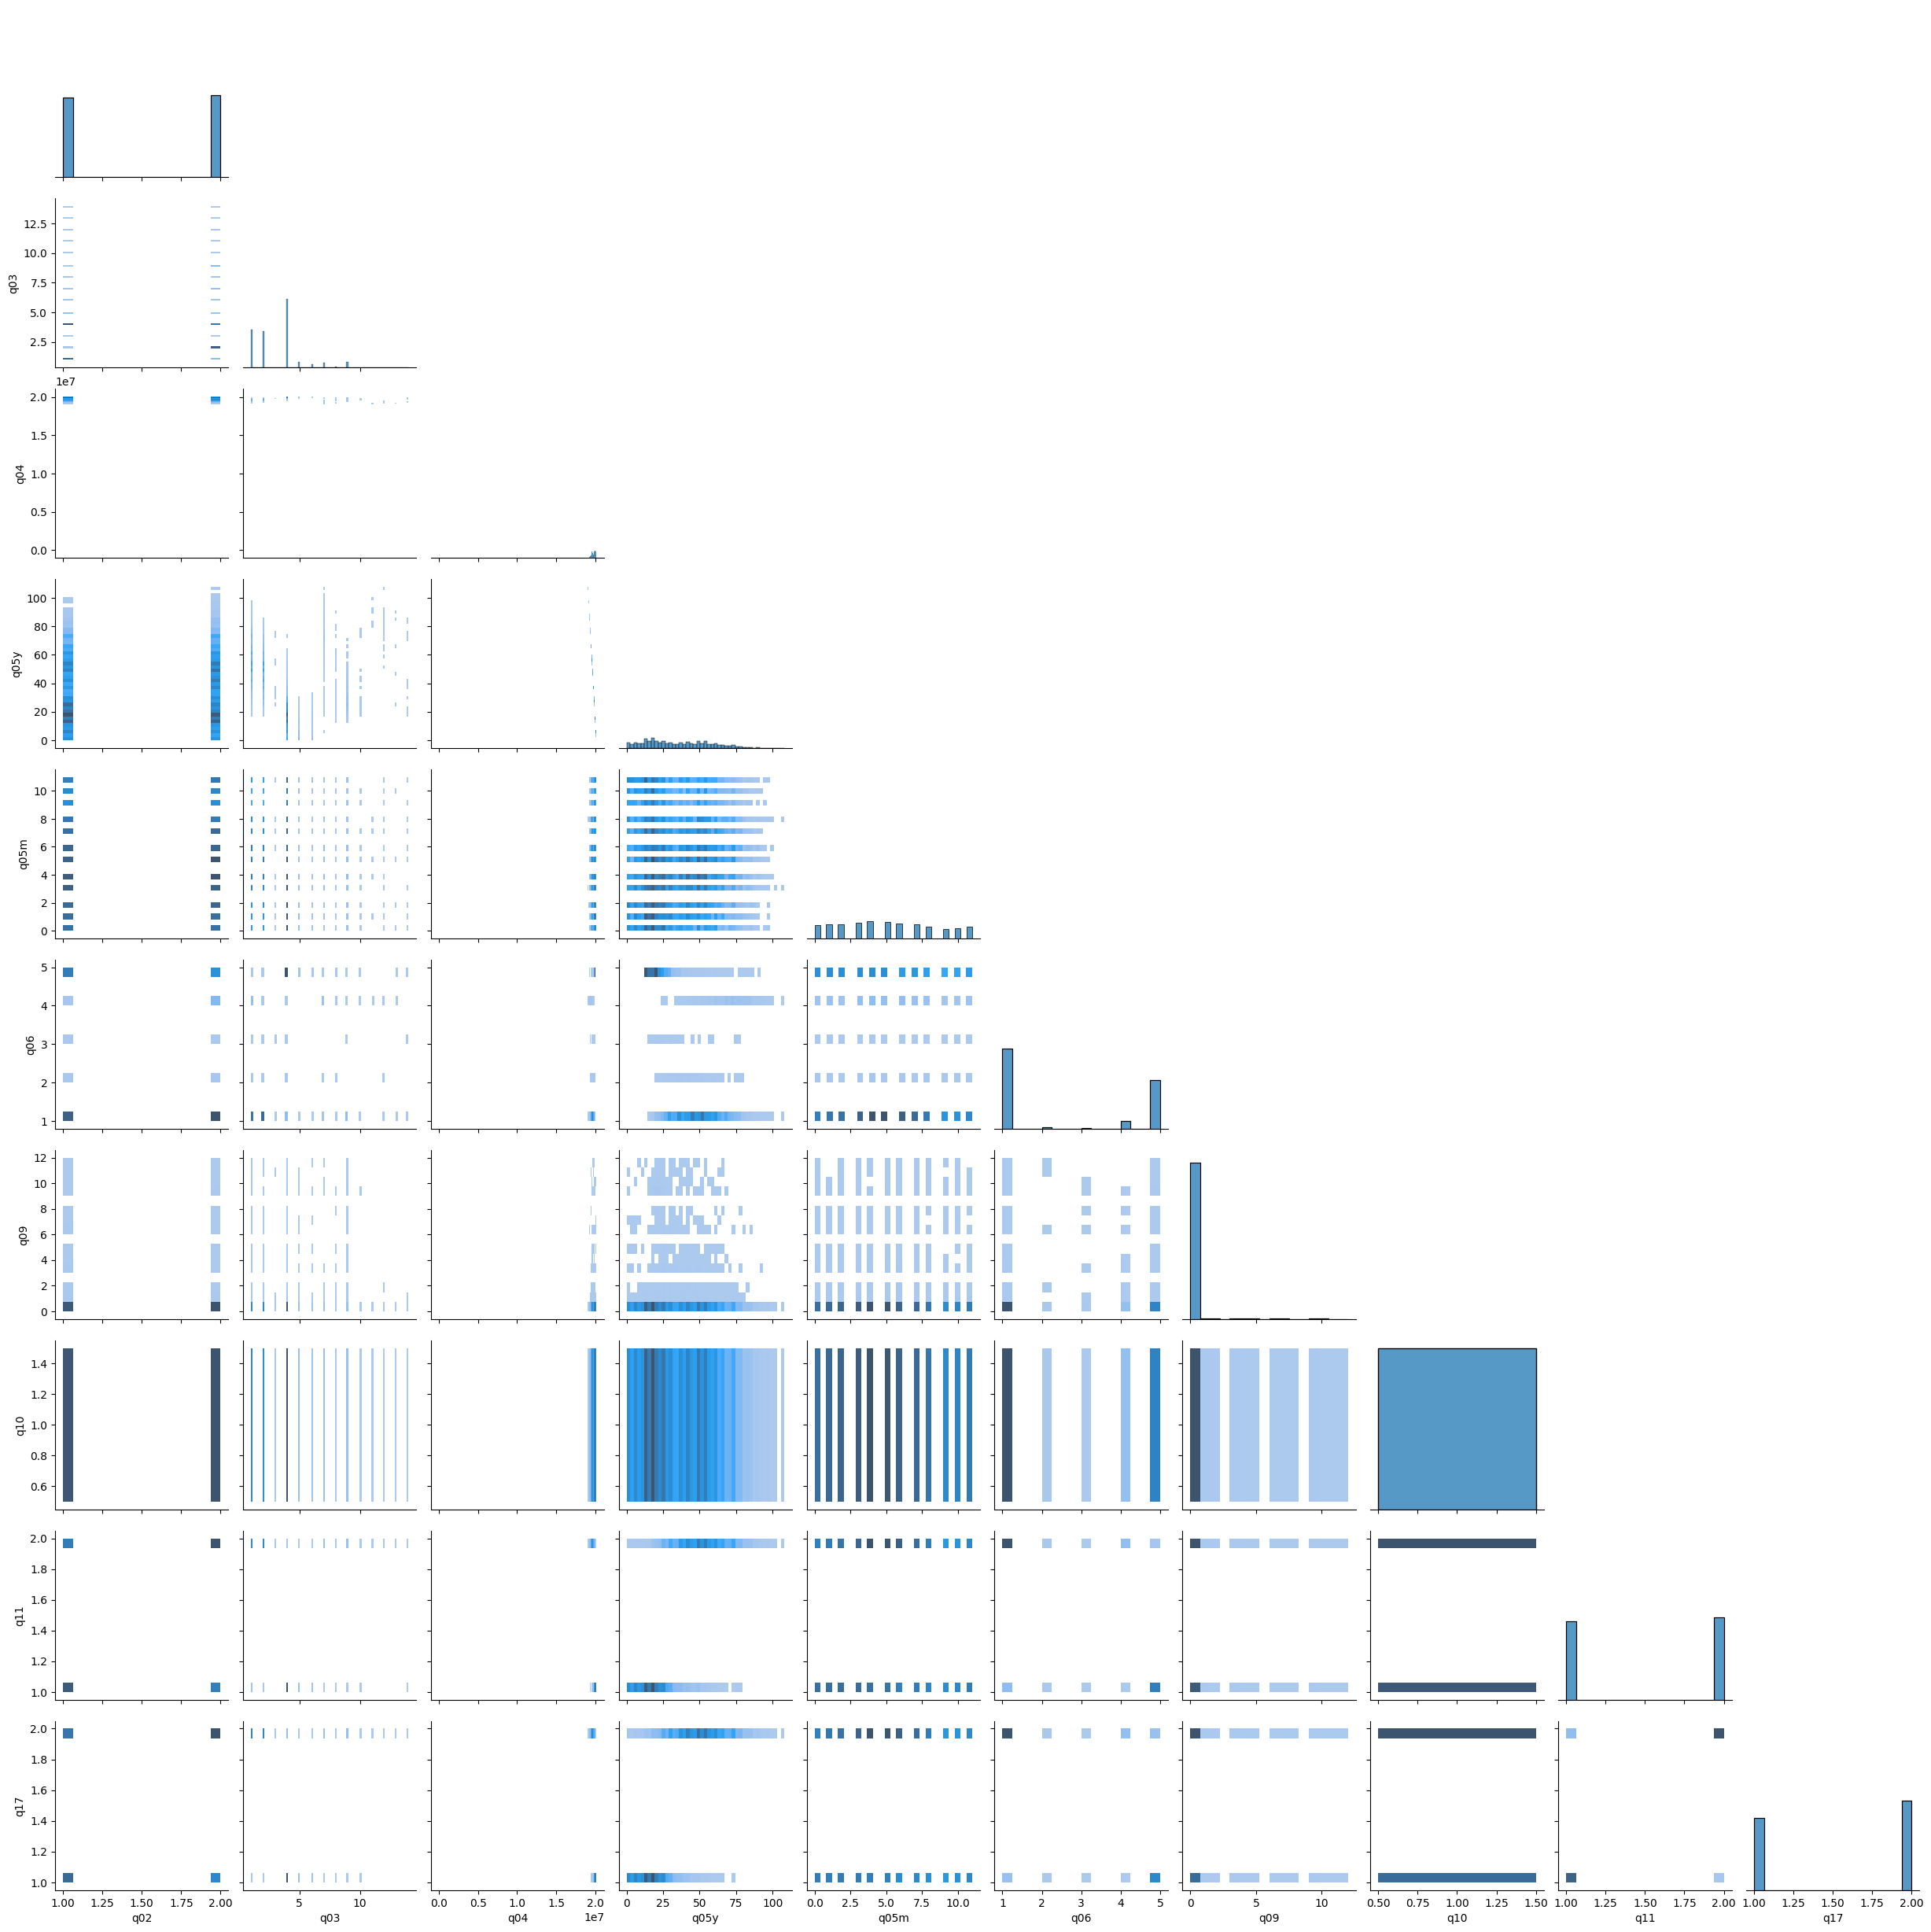

In [11]:
# same as edu_train
threshold = 0.2
house_selected_columns = (
    house_train.isnull().sum(axis=0) / house_train.shape[0] < threshold
)
house_selected_columns = house_selected_columns[house_selected_columns].index.tolist()

# they don't seem to have correlations, so I'm removing them from the plot for clarity
house_selected_columns.remove("psu")
house_selected_columns.remove("hh")
house_selected_columns.remove("hhid")  # this is just combination of psu and hh
house_selected_columns.remove("idcode")

sns.pairplot(house_train[house_selected_columns], kind="hist", corner=True)
print(house_selected_columns)

In [12]:
# q2) SEX
# q3) RELATIONSHIP TO HEAD:
# q4) DATE OF BIRTH:
# q5) How old is [NAME]?
# q6) What is the present marital status of [NAME]?
# q9) For how many months during the past 12 months (since MONTH/ YEAR) has he/she been away from this household?
# q10) Household Member Present?
# q11) Does the natural mother of [NAME] live in this household now?
# q17) Does the natural father of [NAME] live in this household now?

# q6 & (q11 | q17) somewhat related, if married then the parents are likely to not live in the same household
# q9 most people have just haven't left their household in the past 12 months
# q10 only 1 value... might consider removing it
# q11 & q17 are related to each other, if one is true, the other is likely to be true too

### Combining


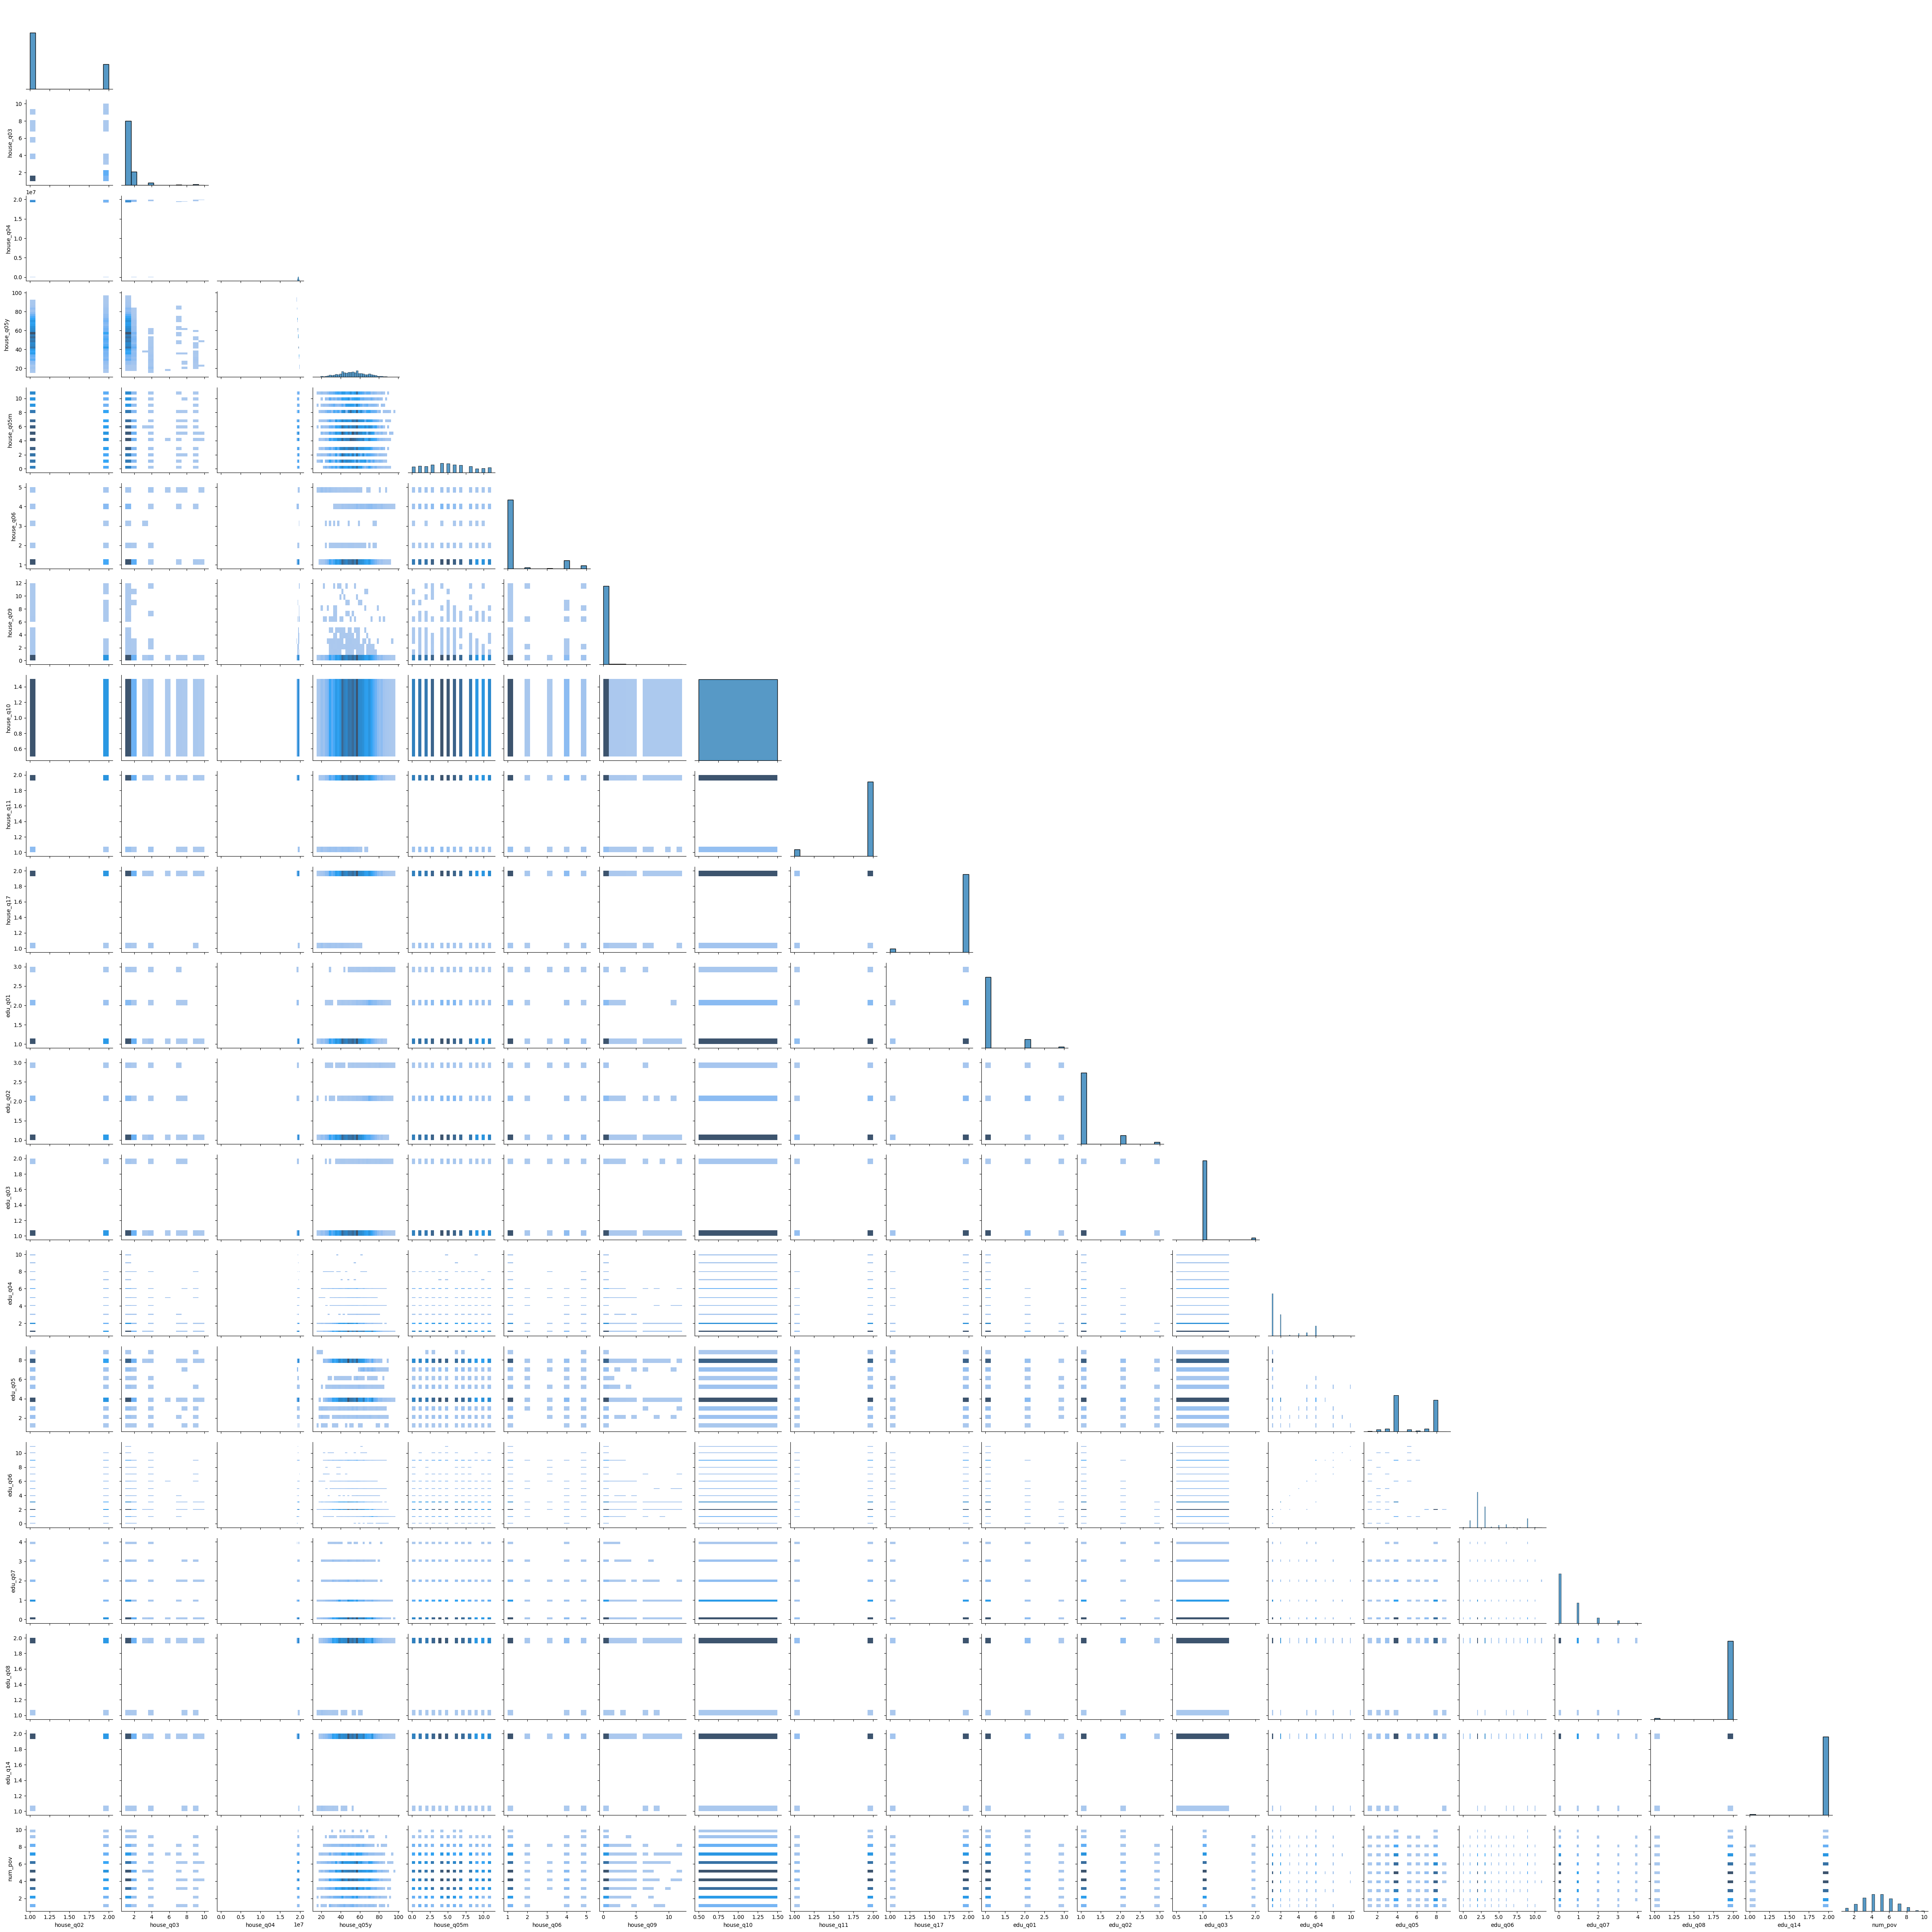

In [13]:
# now some pairplots for the combined data

doi = combined_train_with_num_pov[
    [HOUSE_PREFIX + column.lower() for column in house_selected_columns]
    + [EDU_PREFIX + column.lower() for column in edu_selected_columns]
    + ["num_pov"]
]
sns.pairplot(doi, kind="hist", corner=True)

In [ ]:
# { column : combined_train_with_num_pov.loc[:, [column, "num_pov"]].to_numpy() for column in combined_train_with_num_pov.columns}
corr_arr = (
    combined_train_with_num_pov.drop(Y_COLUMNS + ["psu_hh_idcode"], axis=1)
    .corr()["num_pov"]
    .sort_values()
)
corr_arr

edu_q34   -0.332962
edu_q36   -0.269474
edu_q29   -0.231250
edu_q27   -0.194013
edu_q05   -0.171916
             ...   
edu_q55         NaN
edu_q56         NaN
edu_q58         NaN
edu_q59         NaN
edu_q60         NaN
Name: num_pov, Length: 92, dtype: float64

edu_q34    0.989695
edu_q36    0.989695
edu_q29    0.995878
edu_q27    0.989320
edu_q05    0.026607
num_pov    0.000000
dtype: float64


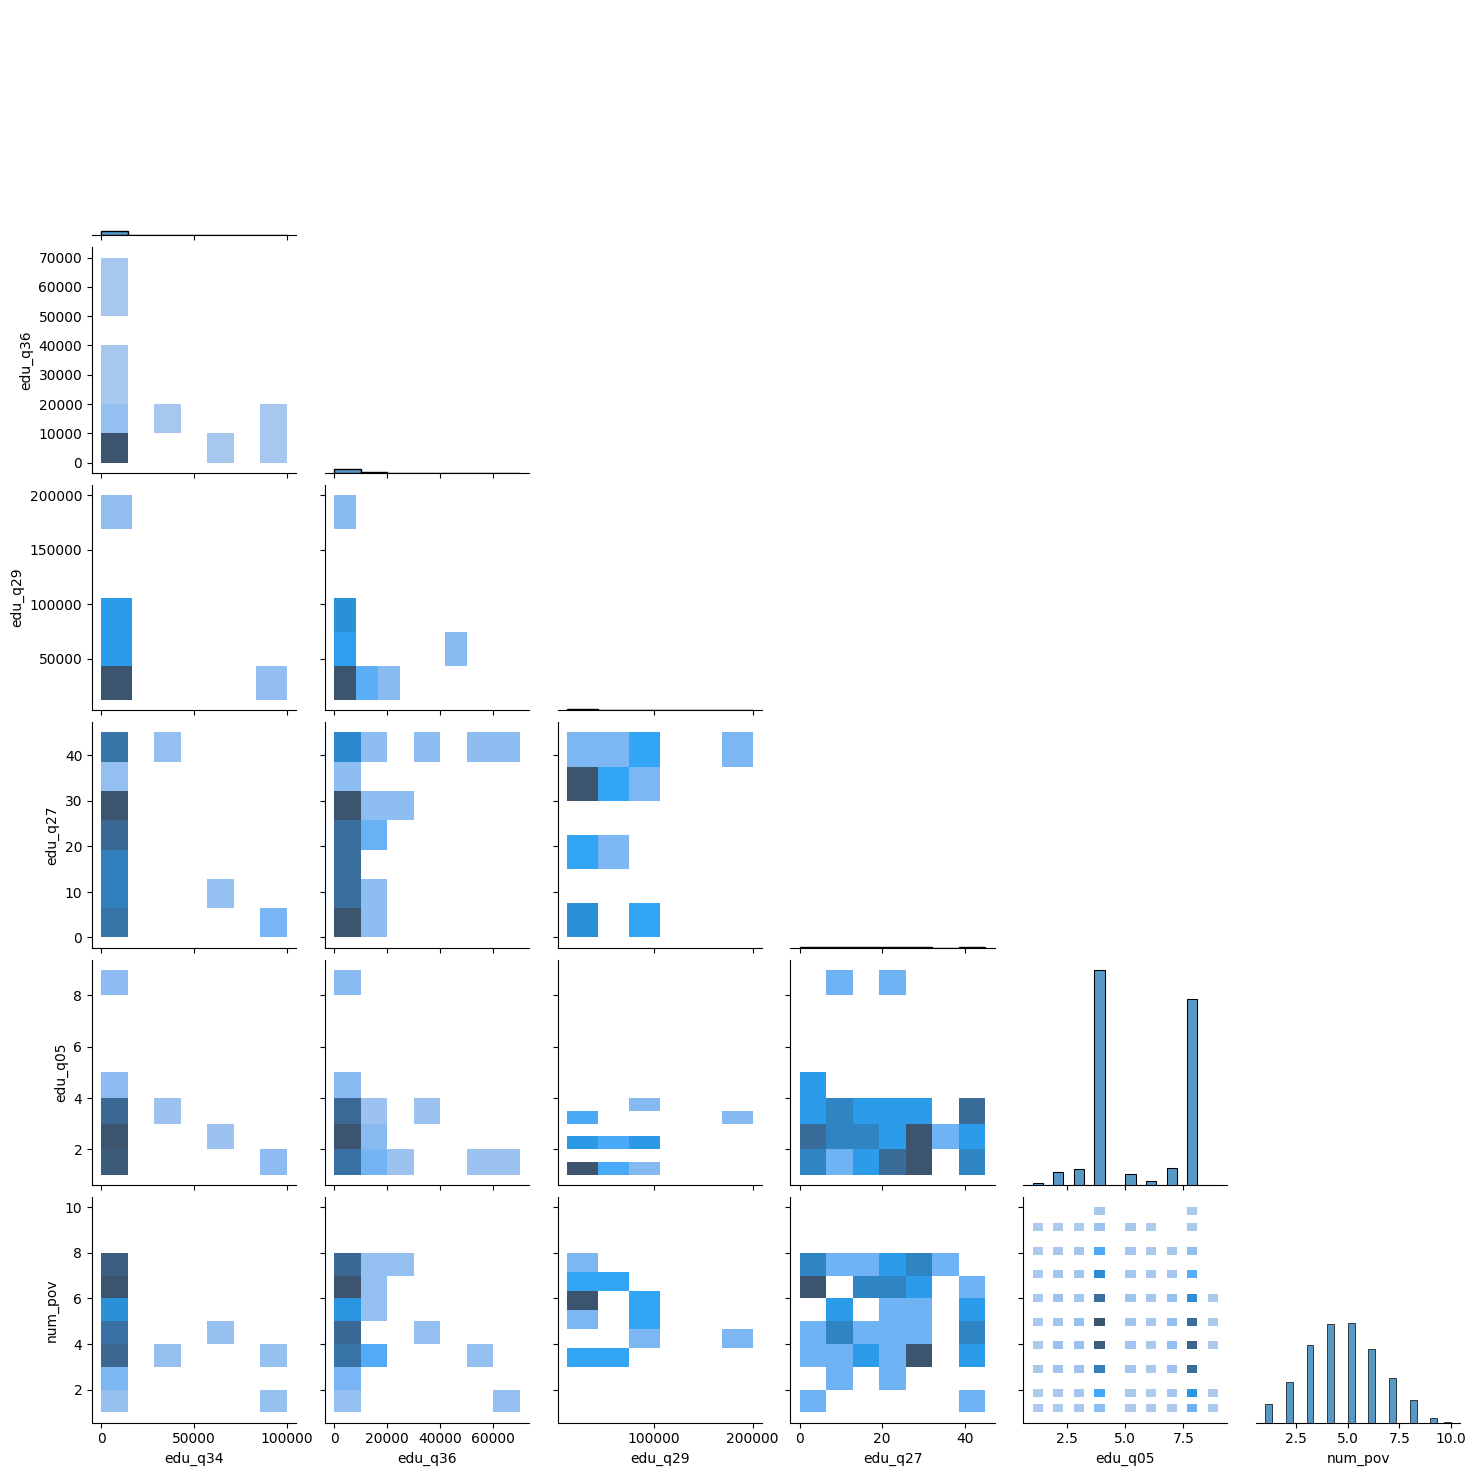

In [ ]:
edu_qs = [34, 36, 29, 27, 5]
corr_doi = combined_train_with_num_pov[[f"edu_q{q:02}" for q in edu_qs] + ["num_pov"]]
print(corr_doi.isnull().sum() / corr_doi.shape[0])
sns.pairplot(corr_doi, kind="hist", corner=True)

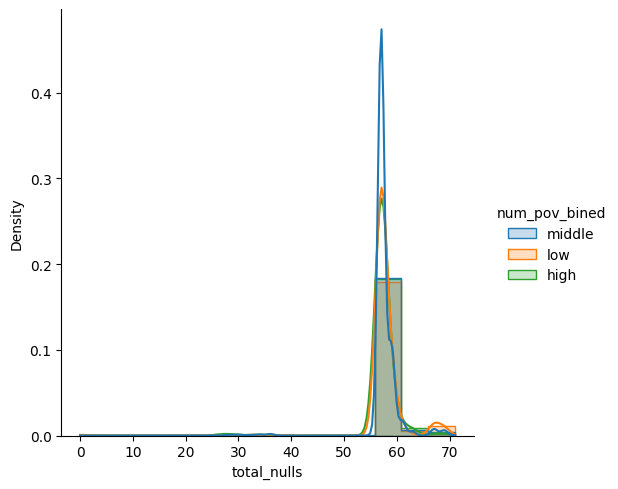

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from data import combined_transformed_train, combined_train_with_num_pov

valid_nulls = combined_transformed_train == -999

null_data = pd.DataFrame(
    np.column_stack(
        [
            valid_nulls.to_numpy().sum(axis=1),
            valid_nulls.loc[:, valid_nulls.columns.str.startswith("house")]
            .to_numpy()
            .sum(axis=1),
            valid_nulls.loc[:, valid_nulls.columns.str.startswith("edu")]
            .to_numpy()
            .sum(axis=1),
            combined_train_with_num_pov["num_pov"],
            # pd.cut(
            #     combined_train_with_num_pov["num_pov"].astype(int),
            #     bins=[0, 2, 5, 8, 10],
            #     labels=["low", "mid-low", "mid-high", "high"],
            # ),
            pd.cut(
                combined_train_with_num_pov["num_pov"].astype(int),
                bins=[0, 2, 6, 10],
                labels=["low", "middle", "high"],
            ),
            # np.where(
            #     (combined_train_with_num_pov["num_pov"].astype(int) >= 3)
            #     & (combined_train_with_num_pov["num_pov"].astype(int) <= 8),
            #     "middle",
            #     "outlier",
            # ),
        ]
    ),
    columns=["total_nulls", "house_nulls", "edu_nulls", "num_pov", "num_pov_bined"],
)

# Ensure that the columns are numeric
null_data["total_nulls"] = pd.to_numeric(null_data["total_nulls"])
null_data["house_nulls"] = pd.to_numeric(null_data["house_nulls"])
null_data["edu_nulls"] = pd.to_numeric(null_data["edu_nulls"])
null_data["num_pov"] = pd.to_numeric(null_data["num_pov"])

# similar null distributions across the poverty levels...
sns.displot(
    null_data,
    x="total_nulls",
    hue="num_pov_bined",
    stat="density",
    common_norm=False,
    kde=True,
    element="step",
)

Also tried adding number of nulls to data and fit it with logistic regression. No improvement can be seen.


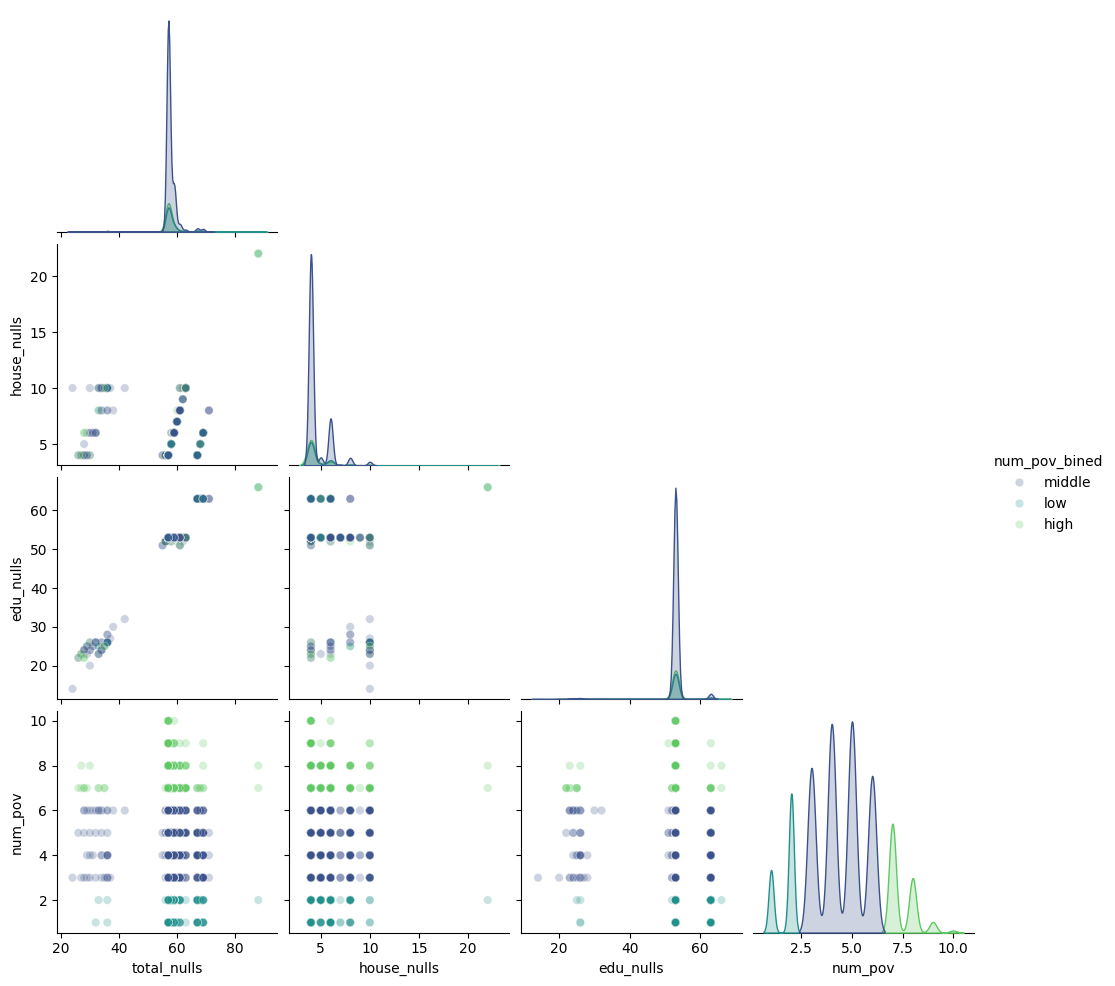

In [15]:
sns.pairplot(
    null_data,
    corner=True,
    plot_kws={"alpha": 0.25},
    hue="num_pov_bined",
    palette="viridis",
)

<Axes: xlabel="('num_pov', 'count')", ylabel="('num_pov', 'std')">

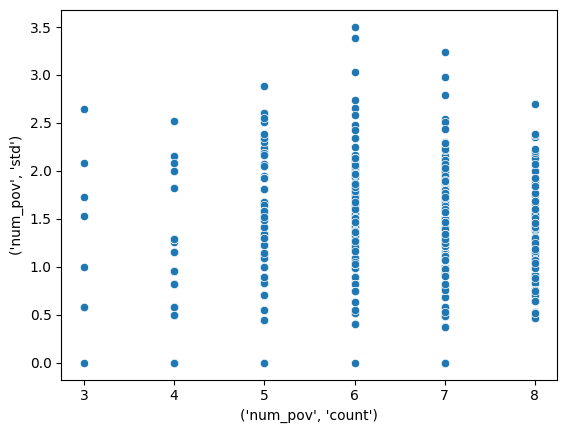

In [16]:
combined_train_with_num_pov[["psu", "hh", "idcode"]] = (
    combined_train_with_num_pov["psu_hh_idcode"].str.split("_", expand=True).astype(int)
)

by_psu_stats = (
    combined_train_with_num_pov[["psu", "num_pov"]]
    .groupby("psu")
    .agg(["mean", "count", "std"])
)
# by_hh_stats = combined_train_with_num_pov[["psu", "hh", "num_pov"]].groupby(["psu", "hh"]).agg(["mean", "count", "std"])
# by_psu_stats.describe()

sns.scatterplot(data=by_psu_stats, x=("num_pov", "count"), y=("num_pov", "std"))

Manual modification to 0 std results did not work, resulting in worse scores in predictions after modifying logistic regression results.


In [37]:
null_cols = combined_train.isnull().sum(axis=0).sort_values(ascending=True)
null_cols

psu_hh_idcode              0
subjective_poverty_1       0
subjective_poverty_2       0
subjective_poverty_3       0
subjective_poverty_4       0
                        ... 
edu_q47                 5336
edu_q16                 5337
edu_q60                 5337
edu_q49                 5337
edu_q31                 5337
Length: 99, dtype: int64

### Groups


In [17]:
from data import combined_transformed_train_with_num_pov

# not attended school
combined_transformed_train_with_num_pov[["edu_q03"]].value_counts()

edu_q03
1.0        5195
2.0         139
Name: count, dtype: int64

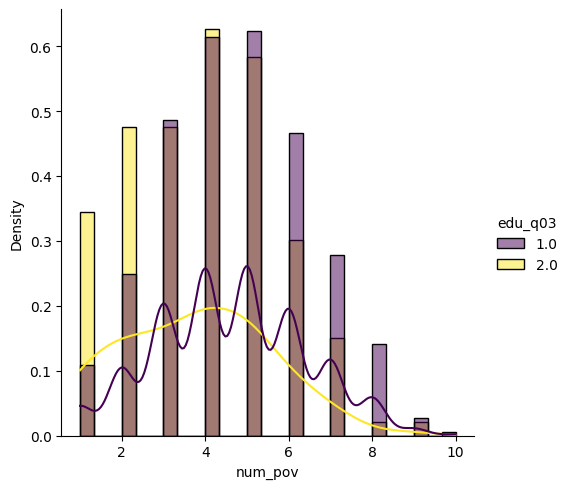

In [63]:
sns.displot(
    combined_transformed_train_with_num_pov,
    x="num_pov",
    hue="edu_q03",
    stat="density",
    common_norm=False,
    kde=True,
    # element="step",
    palette="viridis",
)

# sns.countplot(
#     data=combined_transformed_train_with_num_pov,
#     x="num_pov",
#     hue="edu_q03",
#     palette="viridis",
#     stat="proportion",
# )

In [78]:
combined_transformed_train_with_num_pov[["edu_q14"]].value_counts()

edu_q14
 2.0       5138
-999.0      139
 1.0         57
Name: count, dtype: int64

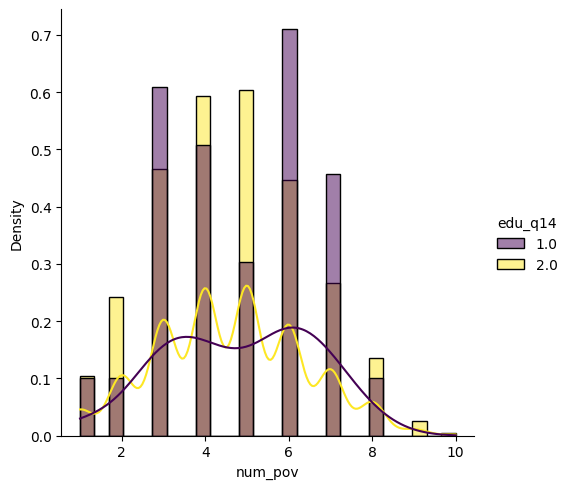

In [ ]:
sns.displot(
    combined_transformed_train_with_num_pov[
        combined_transformed_train_with_num_pov["edu_q14"] != -999
    ],
    x="num_pov",
    hue="edu_q14",
    stat="density",
    common_norm=False,
    kde=True,
    # element="step",
    palette="viridis",
)

In [ ]:
# not attending school this year but had in previous years
combined_transformed_train_with_num_pov[["edu_q15"]].value_counts()

edu_q15
-999.0     5277
 1.0         57
Name: count, dtype: int64

In [ ]:
# 19 years old or less for not enrolling/attending school in past academic year
combined_transformed_train_with_num_pov[["edu_q19"]].value_counts()

edu_q19
 2.0       5134
-999.0      196
 1.0          4
Name: count, dtype: int64

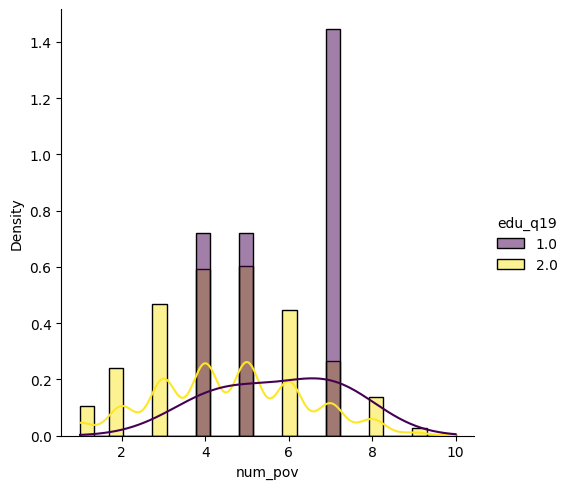

In [ ]:
sns.displot(
    combined_transformed_train_with_num_pov[
        combined_transformed_train_with_num_pov["edu_q19"] != -999
    ],
    x="num_pov",
    hue="edu_q19",
    stat="density",
    common_norm=False,
    kde=True,
    # element="step",
    palette="viridis",
)

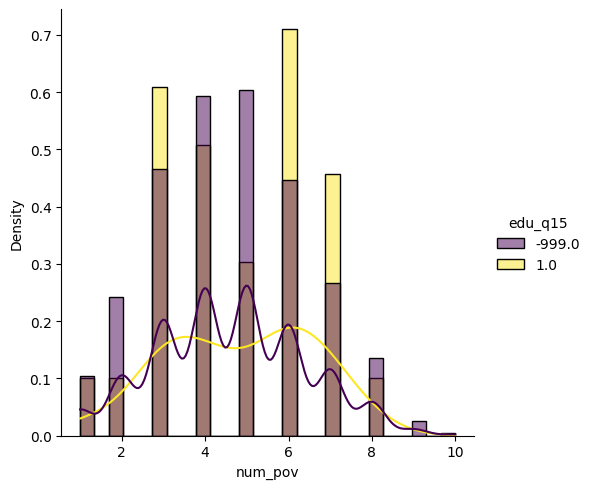

In [ ]:
sns.displot(
    combined_transformed_train_with_num_pov[
        combined_transformed_train_with_num_pov["edu_q03"] == 1
    ],
    x="num_pov",
    hue="edu_q15",
    stat="density",
    common_norm=False,
    kde=True,
    # element="step",
    palette="viridis",
)

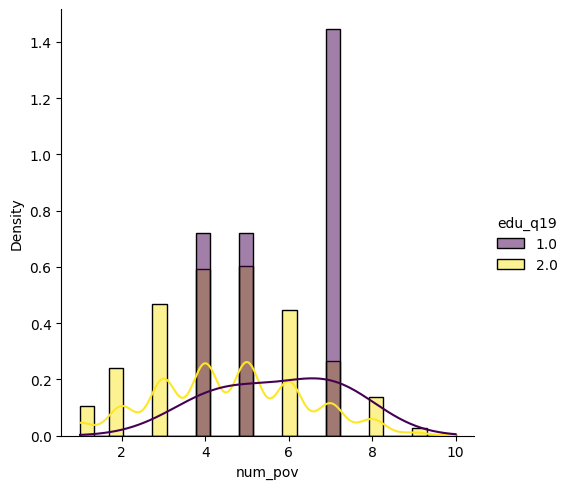

In [ ]:
sns.displot(
    combined_transformed_train_with_num_pov[
        combined_transformed_train_with_num_pov["edu_q19"] != -999
    ],
    x="num_pov",
    hue="edu_q19",
    stat="density",
    common_norm=False,
    kde=True,
    # element="step",
    palette="viridis",
)

In [ ]:
# not attended school this year
combined_transformed_train_with_num_pov[
    ["edu_q16"]
].value_counts()  # lol not allowed to be in the train set

edu_q16
-999.0     5334
Name: count, dtype: int64

In [ ]:
# intend to return to school
combined_transformed_train_with_num_pov[
    ["edu_q20"]
].value_counts()  # lol no one likes school

edu_q20
-999.0     5330
 2.0          4
Name: count, dtype: int64

In [34]:
# let's see the distribution of num_pov for those who do not want to return to school
combined_transformed_train_with_num_pov[
    combined_transformed_train_with_num_pov["edu_q20"] == 2
]["num_pov"].value_counts()

num_pov
7    2
4    1
5    1
Name: count, dtype: int64

In [81]:
combined_transformed_train_with_num_pov["edu_q30"].value_counts()

edu_q30
-999.0    5312
 2.0        22
Name: count, dtype: int64

In [85]:
combined_transformed_train_with_num_pov["edu_q66"].value_counts()

edu_q66
-999.0    5277
 4.0        18
 5.0        12
 2.0         8
 3.0         6
 6.0         6
 1.0         4
 7.0         3
Name: count, dtype: int64

In [ ]:
combined_transformed_train_with_num_pov[
    combined_transformed_train_with_num_pov["edu_q50"] == 1
]

,psu_hh_idcode,subjective_poverty_1,subjective_poverty_2,subjective_poverty_3,subjective_poverty_4,subjective_poverty_5,subjective_poverty_6,subjective_poverty_7,subjective_poverty_8,subjective_poverty_9,subjective_poverty_10,house_q02,house_q03,house_q04,house_q05y,house_q05m,house_q06,house_q07,house_q08,house_q09,house_q10,house_q11,house_q12,house_q13,house_q14,house_q15,house_q16,house_q17,house_q18,house_q19,house_q20,house_q21,house_q22,edu_q01,edu_q02,edu_q03,edu_q04,edu_q05,edu_q06,edu_q07,...,edu_q28,edu_q29,edu_q30,edu_q31,edu_q32,edu_q33,edu_q34,edu_q35,edu_q36,edu_q37,edu_q38,edu_q39,edu_q40,edu_q41,edu_q42,edu_q43,edu_q44,edu_q45,edu_q46,edu_q47,edu_q48,edu_q49,edu_q50,edu_q51,edu_q52,edu_q53,edu_q54,edu_q55,edu_q56,edu_q57,edu_q58,edu_q59,edu_q60,edu_q61,edu_q62,edu_q63,edu_q64,edu_q65,edu_q66,num_pov
2029,196_5_3,0,0,1,0,0,0,0,0,0,0,2.0,4.0,19941204.0,17.0,9.0,5.0,-999.0,-999.0,0.0,1.0,1.0,2.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,5.0,25000.0,2.0,-999.0,2.0,40000.0,100000.0,12000.0,10000.0,10000.0,0.0,70000.0,0.0,242000.0,1.0,2.0,2.0,1.0,2.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,3.0,1.0,3000.0,12000.0,2.0,-999.0,2.0,-999.0,1.0,3.0,4.0,2.0,-999.0,2.0,3


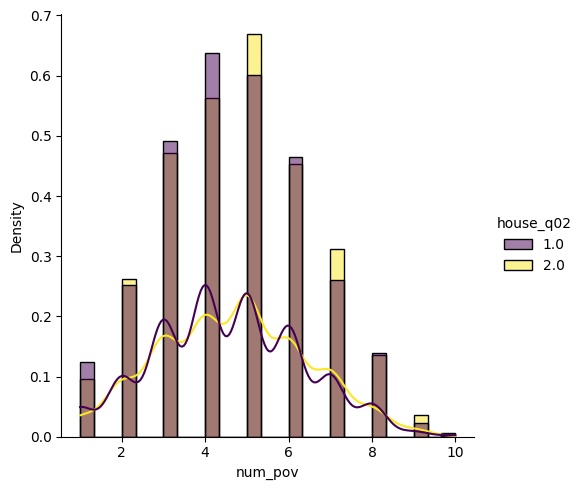

In [ ]:
# male and female appears to have similar but slightly differently biased distribution
sns.displot(
    combined_transformed_train_with_num_pov,
    x="num_pov",
    hue="house_q02",
    stat="density",
    common_norm=False,
    kde=True,
    # element="step",
    palette="viridis",
)

<Axes: xlabel='num_pov', ylabel='Density'>

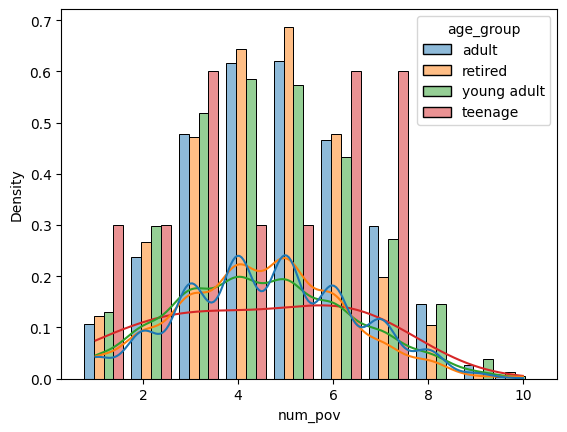

In [115]:
age_bins = [0, 18, 40, 65, 100]
age_labels = ["teenage", "young adult", "adult", "retired"]
age_binned_pov = pd.DataFrame(
    np.column_stack(
        [
            pd.cut(
                combined_transformed_train_with_num_pov["house_q05y"],
                bins=age_bins,
                labels=age_labels,
            ),
            combined_transformed_train_with_num_pov["num_pov"],
        ]
    ),
    columns=["age_group", "num_pov"],
)

sns.histplot(
    age_binned_pov,
    x="num_pov",
    hue="age_group",
    # element="step",
    # palette="crest",
    multiple="dodge",
    kde=True,
    stat="density",
    common_norm=False,
    shrink=2.5,
)